In [1]:
%matplotlib inline

import warnings
from collections import deque
warnings.filterwarnings('ignore')

import random
import pandas as pd
# from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
import json
import graphistry
sns.set_style('whitegrid')

In [2]:
%autosave 60

Autosaving every 60 seconds


In [3]:
file_path = "subset_res.edgelist"
df = pd.read_csv(file_path, header=None, decimal=",", delimiter=" ", names=['ID', 'neighbourID', 'edge_weight'])[1:]
print(len(df))
df.sample(3)

219139


,ID,neighbourID,edge_weight
60788,-81727302,-38985436,0.00226765
103566,-49177878,-165737448,0.00283575
99741,-42521777,-30255249,0.0021850000000000003


In [4]:
ids_list = list(set(list(df["ID"].unique())+list(df["neighbourID"].unique())))
len(ids_list)

4939

In [5]:
df_data = pd.read_csv('groups_info', sep =';')

In [6]:
df_data = pd.read_csv('groups_info', sep=";",  dtype={"Name":str, "ScreenName":str, "Type":str, "Url":str, "ID":str, "MembersCount":int, "neighbourID":str})
df_data

,Name,ScreenName,Type,Url,ID,MembersCount,neighbourID
0,Никогда не сдавайся!,never_g1ve_up,2,https://vk.com/club53503880,-53503880,317713,-53503880
1,Записки Неизвестного и ОбщежитиЕ | 16 ноября,nzapiski.obshezhitie,3,https://vk.com/club60064207,-60064207,96,-60064207
2,Новоладожский судоремонтный завод,novladnlsz,1,https://vk.com/club153385562,-153385562,203,-153385562
3,"Молодёжный центр ""Зеркало"" | Красноярск",mczerkalo,2,https://vk.com/club34820906,-34820906,4145,-34820906
4,АВТОМОБИЛЬНЫЙ ТУР ПО ТОПОВЫМ МЕСТАМ СИЛЫ КРЫМА,club93008936,3,https://vk.com/club93008936,-93008936,99,-93008936
...,...,...,...,...,...,...,...
4934,ЖизниДар,zhiznidar,2,https://vk.com/club58011970,-58011970,7879,-58011970
4935,Институт Рокеров | Rock,rock_ins,2,https://vk.com/club55844834,-55844834,325435,-55844834
4936,Московский транспорт,transportmos,2,https://vk.com/club96196967,-96196967,87132,-96196967
4937,Живая природа,newsnature,2,https://vk.com/club40686068,-40686068,78428,-40686068


In [8]:
result = df.copy()
result = pd.merge(result,
                 df_data[['ID', 'Name']],
                 on='ID')
result.rename(columns={"Name": "ID_name"}, inplace=True)

result = pd.merge(result,
                 df_data[['neighbourID', 'Name']],
                 on='neighbourID')
result.rename(columns={"Name": "neighbourID_name"}, inplace=True)
result.head()
len(result)
result

,ID,neighbourID,edge_weight,ID_name,neighbourID_name
0,-59068817,-110750331,0.0021646,Пироговая 29,Важные Вещи. Сток-центр распродаж детской одежды
1,-3728827,-110750331,0.00236148,Серьёзно о прививках и не только,Важные Вещи. Сток-центр распродаж детской одежды
2,-98991503,-110750331,0.00384615,"Иван - Чай ,Чага,Травы и Чай (Вологда)",Важные Вещи. Сток-центр распродаж детской одежды
3,-47683898,-110750331,0.00170736,Жесть по-Архангельски,Важные Вещи. Сток-центр распродаж детской одежды
4,-35741689,-110750331,0.0194171,ВОП — о жизни Вологды,Важные Вещи. Сток-центр распродаж детской одежды
...,...,...,...,...,...
219134,-60150437,-50923603,0.0294118,29 ноября Впервые в Котласе ЧЁРНЫЙ ОБЕЛИСК!!!!,Открытие мотосезона 2013
219135,-49094000,-68345520,0.015872999999999998,"Муз. инструменты из т/п ""Спокойной ночи, малыши""","Подслушано ""ГУДИ"""
219136,-82567516,-78435823,0.00467775,Сантехника–смешно и серьёзно,Noskova Marina/IFBB/Fitness bikini
219137,-102520640,-50838243,0.00241187,RoboShop - всё для Arduino и робототехники!,Electronics Engineering Blog


df.sample(3)

In [9]:
graphistry.register(key='3bd0ff5a5304a3ee27de2ca78ac7b67bbc48dc67409c255c0f70250955cf967c')
print(graphistry.__version__)

0.14.0


In [10]:
g = graphistry.edges(result).bind(source='ID_name', destination='neighbourID_name', edge_weight='edge_weight')

In [11]:
g.plot()

Uploading 7584 kB. This may take a while...


In [28]:
file_path = "subset_500_res.edgelist"
df_sample = pd.read_csv(file_path, header=None, decimal=",", delimiter=" ", names=['ID', 'neighbourID', 'edge_weight'])[1:]
print(len(df_sample))
print(df_sample.sample(3))
g = graphistry.edges(df_sample).bind(source='ID', destination='neighbourID', edge_weight='edge_weight')
g.plot()

2009
             ID neighbourID edge_weight
1034  -33743708   -58386555  0.00272487
1736  -31342849   -19154688  0.00407308
255   -33743708     -692972  0.00210025


In [13]:
file_path = "subset_res.edgelist"
df_sample = pd.read_csv(file_path, header=None, decimal=",", delimiter=" ", names=['ID', 'neighbourID', 'edge_weight'])[1:]
print(len(df_sample))

# df_sample = pd.merge(df_sample,
#                  df_data[['ID', 'Name']],
#                  on='ID')
# df_sample.rename(columns={"Name": "ID_name"}, inplace=True)

# df_sample = pd.merge(df_sample,
#                  df_data[['neighbourID', 'Name']],
#                  on='neighbourID')
# df_sample.rename(columns={"Name": "neighbourID_name"}, inplace=True)

# print(df_sample.head())

g = graphistry.edges(result).bind(source='ID', destination='neighbourID', edge_weight='edge_weight')
g.plot()

219139
Uploading 7494 kB. This may take a while...


In [14]:
def groups2graph(graph, df):
    roster = dict()
    for index, row in df.iterrows():
        ID = row['ID']
        neighbourID = row['neighbourID']
        edge_weight = float(row['edge_weight'])
        graph.add_edge(ID, neighbourID, weight=edge_weight)
        
    return graph

In [15]:
# small_graph= nx.Graph()
# small_graph = groups2graph(graph, df[:100])

In [29]:
graph = nx.Graph()
graph = groups2graph(graph, df_sample)

In [17]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 4939
Number of edges: 219135
Average degree:  88.7366


In [18]:
nx.write_gml(graph, "graph.gml")

In [19]:
graph = nx.read_gml("graph.gml")

In [20]:
n = graph.number_of_nodes () 
m = graph.number_of_edges () 
print ("Количество узлов:", str (n)) 
print ("Количество ребер:", str (m)) 
print ("Количество связных компонентов: ", str(nx.number_connected_components (graph)))

Количество узлов: 4939
Количество ребер: 219135
Количество связных компонентов:  6


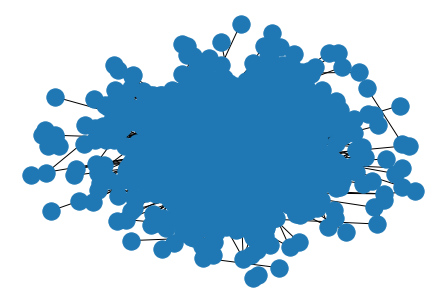

In [21]:
# plt.figure (figsize = (12,8)) 
nx.draw (graph)

In [32]:
node2vec = Node2Vec(graph, dimensions=100, walk_length=80, num_walks=15, workers=10, temp_folder="/mnt")
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.get_vector(list(graph.nodes)[0])

Generating walks (CPU: 2):   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 4):   0%|          | 0/2 [00:00<?, ?it/s]


Generating walks (CPU: 5):   0%|          | 0/2 [00:00<?, ?it/s]



Generating walks (CPU: 6):   0%|          | 0/1 [00:00<?, ?it/s]




Generating walks (CPU: 7):   0%|          | 0/1 [00:00<?, ?it/s]





Generating walks (CPU: 8):   0%|          | 0/1 [00:00<?, ?it/s]






Generating walks (CPU: 9):   0%|          | 0/1 [00:00<?, ?it/s]







Generating walks (CPU: 10):   0%|          | 0/1 [00:00<?, ?it/s]








Generating walks (CPU: 1): 100%|██████████| 2/2 [03:40<00:00, 110.25s/it]








Generating walks (CPU: 7): 100%|██████████| 1/1 [03:40<00:00, 220.59s/it]



Generating walks (CPU: 10): 100%|██████████| 1/1 [03:40<00:00, 220.82s/it][A

Generating walks (CPU: 9): 100%|██████████| 1/1 [03:40<00:00, 220.87s/it]


Generating walks (CPU: 5): 100%|██████████| 2/2 [05:45<00:00, 172.62s/it]


array([-1.2853605 ,  0.6061351 , -0.06932255, -2.5238438 , -1.4654254 ,
        0.3254113 ,  0.4634494 , -1.2184248 , -1.0438173 ,  1.0348667 ,
        0.5583778 , -2.1309044 , -0.8019702 , -1.4947149 ,  0.4027909 ,
        1.0283419 ,  0.25005236, -1.9585426 , -0.60521305,  0.5110491 ,
        0.10505443, -0.11118312,  0.01259553, -1.023146  ,  2.0281825 ,
        0.7615499 ,  0.3160845 , -0.4328385 , -0.6391469 ,  2.3464122 ,
       -0.7432948 , -0.42844042,  0.56806594,  0.7133544 , -1.1394404 ,
        0.7605705 , -2.165177  , -0.20898175, -0.5782955 , -0.70247906,
        0.4188258 ,  1.6342602 , -0.5577483 , -0.9687973 ,  1.6166563 ,
        1.0741657 , -0.520144  , -0.42270944,  0.58097696, -1.8114172 ,
        2.3229158 ,  1.0595316 ,  1.2201357 ,  2.42942   ,  1.762679  ,
       -1.2595378 , -0.10589811,  1.7366414 ,  0.6261307 , -0.92242   ,
       -0.3427931 ,  0.35133272,  0.41428584, -0.8516842 , -0.18256435,
        0.08131821,  0.79778504, -2.0243917 ,  0.31945148, -0.22

graph: 
    Первый позиционный аргумент должен быть графом networkx. 
    Имена узлов должны быть целыми числами или строками. 
    На выходной модели они всегда будут строками.
    
dimensions:
    Размеры вложения (по умолчанию: 128)
    
walk_length: 
    Количество узлов в каждой прогулке (по умолчанию: 80)
    
num_walks: 
    Количество прогулок на узел (по умолчанию: 10)


p: Гиперпараметр, показывающий, смещен ли обход в направлении исследования внутрь (по умолчанию: 1)

q: Гиперпараметр, оказывающий, смещен ли обход в направлении исследования наружу  (по умолчанию: 1)
    
    Когда p и q оба равны 1 (по умолчанию), это, по сути, сводится к чисто случайному блужданию    

weight_key: 
    На взвешенных графиках это ключ для атрибута weight (по умолчанию: 'weight')
workers: 
    Количество рабочих для параллельного выполнения (по умолчанию: 1)

temp_folder: 
    Строковый путь, указывающий на папку для сохранения копии графика в общей памяти.
    (Предоставляется при работе с графиками, которые слишком велики, 
     чтобы поместиться в памяти во время выполнения алгоритма.)

In [33]:
model.wv.save_word2vec_format("saved_model_small")

In [35]:
list(graph.nodes)

['-11551871',
 '-55192703',
 '-1113992',
 '-63902708',
 '-47889694',
 '-78973258',
 '-22310525',
 '-42533142',
 '-28313198',
 '-33509240',
 '-9663504',
 '-8969700',
 '-125527572',
 '-130969317',
 '-138327290',
 '-29031313',
 '-37385042',
 '-60359044',
 '-151321828',
 '-17210652',
 '-61143904',
 '-68567387',
 '-36458447',
 '-147756546',
 '-39195765',
 '-18851855',
 '-95868857',
 '-97902875',
 '-161289869',
 '-140552805',
 '-45661658',
 '-59517816',
 '-41574893',
 '-49525702',
 '-58011970',
 '-30671838',
 '-76725507',
 '-114961279',
 '-160941617',
 '-50704663',
 '-41412865',
 '-33743708',
 '-34060521',
 '-37160097',
 '-44613773',
 '-71068675',
 '-27562580',
 '-34829296',
 '-211740',
 '-100262528',
 '-63216675',
 '-65697692',
 '-70946927',
 '-47661616',
 '-30767446',
 '-181031',
 '-74085170',
 '-163319281',
 '-185251187',
 '-84418788',
 '-126568871',
 '-44758157',
 '-19154688',
 '-40166773',
 '-20954938',
 '-50877045',
 '-122438064',
 '-116139454',
 '-152062129',
 '-4378981',
 '-20823552'

In [25]:
#Т.к. обучение занимает много времени, загрузим эмбеддинги из файла (использовалось для 65к групп)
# from gensim.models import KeyedVectors

# model = KeyedVectors.load_word2vec_format('small_res.emb', binary=False)
model.wv.get_vector("110082689")

array([ 5.06568e-01, -7.17264e-02,  1.31919e+00, -8.87469e-01,
        9.05263e-01, -3.28905e-02, -1.74266e+00, -2.75865e-01,
       -1.07608e+00,  1.21246e+00,  1.67162e-01,  1.13019e+00,
       -7.99150e-01, -1.66169e+00, -1.95406e-01, -1.36221e-01,
        6.21017e-01,  3.93591e-01, -3.81213e-01,  9.68586e-02,
       -5.91943e-02,  5.13347e-01,  4.09856e-01,  4.37756e-02,
       -4.05707e-02, -7.03835e-02, -1.57916e-01, -5.72675e-02,
        5.17322e-01, -5.09236e-01, -1.29293e-01,  5.22190e-02,
       -7.80586e-01,  3.56728e-01, -4.97181e-02, -2.43929e-01,
        2.64872e-01, -2.58917e-01,  7.62523e-02, -2.02944e-01,
       -9.93331e-02,  4.44226e-01, -1.14119e-01,  1.42753e-01,
       -4.09553e-01,  1.39739e-01, -6.28840e-02, -1.86286e-01,
        3.02092e-01,  2.81512e-01, -2.55332e-01,  5.19888e-02,
        1.20561e-02,  2.39571e-01, -2.93189e-01,  4.36481e-03,
        9.53944e-02,  1.02096e-01,  3.92286e-01,  8.31743e-02,
       -2.86053e-01, -9.88023e-02,  1.85631e-01,  1.319

In [40]:
df_sample

,ID,neighbourID,edge_weight
1,-11551871,-55192703,0.00837759
2,-1113992,-63902708,0.00523349
3,-47889694,-78973258,0.00216333
4,-22310525,-42533142,0.00197234
5,-42533142,-28313198,0.0027297
...,...,...,...
2005,-42363911,-28044924,0.00195134
2006,-31665195,-62663002,0.00246577
2007,-211740,-91647940,0.00354383
2008,-211740,-50686186,0.00418836


In [48]:
#Список наиболее похожих вершин
node_id = 30
sim_list = model.wv.most_similar (list(graph.nodes)[node_id])
print(list(graph.nodes)[node_id])
for sim in sim_list:
    print(sim)

-45661658
('-42897151', 0.9315690994262695)
('-22310525', 0.9164897203445435)
('-137029671', 0.9115293622016907)
('-138638111', 0.9082853198051453)
('-95868857', 0.9077467918395996)
('-105250379', 0.8839610815048218)
('-33755395', 0.8612053394317627)
('-47661616', 0.8277522325515747)
('-74085170', 0.8242624998092651)
('-28256828', 0.8110561370849609)


In [25]:
#Векторизация рёбер
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

#Получение наиболее похожих рёбер
# edges_kv =edges_embs.as_keyed_vectors () 

edges_kv = edges_embs.as_keyed_vectors()
edges_kv.most_similar(str(('-20301629', '-53313256')))


Generating edge features: 100%|██████████| 12199330/12199330.0 [06:59<00:00, 29084.67it/s]


KeyError: "word '('-20301629', '-53313256')' not in vocabulary"

# Link Prediction

In [ ]:
# Возьмём случайную выборку ребер 
edge_subset = random.sample (graph.edges (), int(0.25*graph.number_of_edges())) 

# удалим некоторые края 
G_train = graph.copy () 
G_train.remove_edges_from (edge_subset)

In [ ]:
edge_subset_size = len (list (edge_subset)) 
print ("Удалено:", str (edge_subset_size)) 
print ("Осталось:", str ((m - edge_subset_size)))

In [ ]:
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
prediction_jaccard[:10]

In [ ]:
G_train_up = nx.Graph()

for el in prediction_jaccard:
    G_train_up.add_edge(el[0], el[1],  weight=el[2])
len(G_train_up)

In [ ]:
G_train_df = pd.DataFrame(prediction_jaccard, columns=['ID', 'neighbourID', 'edge_weight'])
G_train_df

In [ ]:
g = graphistry.edges(G_train_df).bind(source='ID', destination='neighbourID', edge_weight='edge_weight')
g.plot()

In [ ]:
prediction_adamic = list(nx.adamic_adar_index(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_adamic])
prediction_adamic[:10]

In [ ]:
node2vec = Node2Vec(G_train, dimensions=100, walk_length=15, num_walks=15, workers=10, temp_folder="/mnt")
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.get_vector(list(G_train.nodes)[0])

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('FinalResults/small_res.emb', binary=False) #заменить на обрезанный граф
model.wv.get_vector("110082689")

In [ ]:
#мы можем получить наиболее похожее ребро, 
#которое можно использовать для прогнозирования отсутствующих ребер

from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

edges_kv = edges_embs.as_keyed_vectors()  #получаем все возможные рёбра (осторожно может быть слишком большим)
edges_kv.most_similar (str ((list(G_train.nodes)[0], list(G_train.nodes)[5])))  